# eEOM DEMO

---

This is a demostration for running the genetic algorithm for structural refinement against the small- and wide-angle x-ray scattering data.

Author: Yen-Lin Chen, 08/10/2020



### Background

---

The refinement is implemented as the genetic algorithm and based on the customized $\chi^2$: 

\begin{equation}
\chi^2 = \frac{1}{n-1} \sum_{i=1}^n \left\{ \frac{\log_{10}\left[ I_{ens}(q_i) \right] - \log_{10} \left[ I_{exp}(q_i) \right] }{\sigma'(q_i)} \right\}^2,
\end{equation}

where $I_{ens}(q_i)$ is the computed scattering profile from the ensemble and $I_{exp}(q_i)$ is the experimental measurement at $q_i$. $\sigma'(q_i)$ is the propagated error. 

\begin{equation}
\sigma'(q_i) = \frac{\sigma(q_i)}{I_{exp}(q_i)\log10} = \frac{1}{\left[ \frac{S}{N} \right]_i \log10}
\end{equation}


The refinement function was developed and run in *Julia version 1.6.0-DEV*.


### Required Packages

---

1. JLD.jl
2. StatsBase.jl
3. DelimitedFiles.jl
4. Plots.jl
5. Dierckx.jl




In [1]:
# Load the dependencies

using Plots, DelimitedFiles, StatsBase, JLD
include("ga.jl"); # The algorithm

In [2]:
# Load data to play with
# I will talk about the data later
pool1, pool2 = load("pool.jld", "pool1", "pool2"); 
data1, data2 = readdlm("data1.dat"), readdlm("data2.dat"); 
q = collect(0.0:0.005:1.25); # The q grid

### Example 1: 

---

The `data1` and `pool1` pair. 


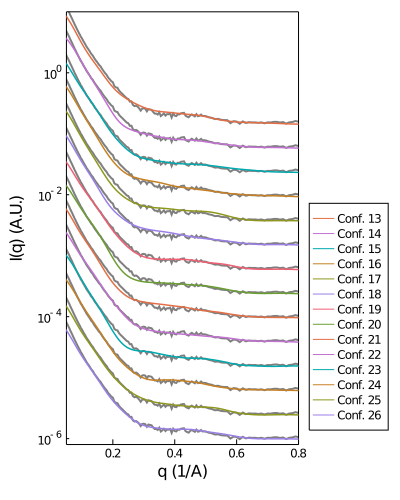

In [11]:
# Plot the data and see what's going on
p = plot(size=(400, 500), grid=false, legend=:outerbottomright, framestyle=:box);
s = 0.4;
for i = 1:14
    plot!(data1[:,1], s^(i-1) * data1[:,2], yscale=:log10, lw=2.0, c=:black, linealpha=0.5, lab="");
    plot!(q, s^(i-1)*pool1[:,7i-6], lw=1.5, yscale=:log10, lab="Conf. $(12+i)");
end
xlims!(0.05, 0.8)
ylims!(0.8e-6, 10)
ylabel!("I(q) (A.U.)")
xlabel!("q (1/A)")

This is just plotting some of the conformations in `pool1` against `data1` with offsets for better visualization. It is suggested to see this plot first since the `Refine` function is not scaling for you. 

Now let's run the `eEOM` refinement using the `Refine` function in `ga.jl`.

In [12]:
# Run the eEOM structural refinement
idx = findall(data1[:,1] .<= 0.8); # Cuts the experimental profile
tmp = data1[idx, :];
ensize = 10; # ensemble size
cycles = 50; # number of cycles
survivors1 = zeros(Int64, ensize, cycles); # container for selected conformations
fitness1 = zeros(cycles); # container for fitness scores

t = @elapsed for i = 1:cycles
    @info("===== Cycle number $i ====");
    # The core of eEOM: getting the best ensemble from all the 100000 generations
    fitness1[i], survivor = Refine(tmp, [q pool1], ensize, 0.15; population=10, maxiter=100000, reports=10);
    survivors1[:,i] = survivor[:,1]; 
end

println("- eEOM for $cycles cycles and $(size(pool1, 2)) conformaitons took $(round(t, digits=2)) seconds.");

┌ Info: ===== Cycle number 1 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.51587, best fit so far = 0.4474.
Generation #20000: fitness = 0.49856, best fit so far = 0.44413.
Generation #30000: fitness = 0.61213, best fit so far = 0.44413.
Generation #40000: fitness = 0.65826, best fit so far = 0.44413.
Generation #50000: fitness = 0.49971, best fit so far = 0.44396.
Generation #60000: fitness = 0.69345, best fit so far = 0.44396.
Generation #70000: fitness = 0.64867, best fit so far = 0.44396.
Generation #80000: fitness = 0.50304, best fit so far = 0.44396.
Generation #90000: fitness = 0.65665, best fit so far = 0.44396.
Generation #100000: fitness = 0.6715, best fit so far = 0.44396.
Finished Genetic Algorithm, with best fitness = 0.44396.


┌ Info: ===== Cycle number 2 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.58868, best fit so far = 0.45339.
Generation #20000: fitness = 0.60585, best fit so far = 0.45009.
Generation #30000: fitness = 0.51705, best fit so far = 0.44857.
Generation #40000: fitness = 0.56632, best fit so far = 0.44585.
Generation #50000: fitness = 0.51985, best fit so far = 0.44585.
Generation #60000: fitness = 0.48491, best fit so far = 0.44585.
Generation #70000: fitness = 0.67473, best fit so far = 0.44585.
Generation #80000: fitness = 0.56989, best fit so far = 0.44585.
Generation #90000: fitness = 0.63684, best fit so far = 0.44413.
Generation #100000: fitness = 0.7374, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 3 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.73462, best fit so far = 0.45936.
Generation #20000: fitness = 0.59965, best fit so far = 0.44731.
Generation #30000: fitness = 0.52111, best fit so far = 0.44731.
Generation #40000: fitness = 0.69165, best fit so far = 0.44413.
Generation #50000: fitness = 0.56107, best fit so far = 0.44413.
Generation #60000: fitness = 0.51179, best fit so far = 0.44413.
Generation #70000: fitness = 0.6355, best fit so far = 0.44413.
Generation #80000: fitness = 0.49479, best fit so far = 0.44413.
Generation #90000: fitness = 0.50911, best fit so far = 0.44413.
Generation #100000: fitness = 0.72958, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 4 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.63439, best fit so far = 0.46462.
Generation #20000: fitness = 0.57941, best fit so far = 0.45339.
Generation #30000: fitness = 0.61102, best fit so far = 0.45339.
Generation #40000: fitness = 0.56932, best fit so far = 0.45339.
Generation #50000: fitness = 0.57131, best fit so far = 0.45339.
Generation #60000: fitness = 0.56413, best fit so far = 0.45339.
Generation #70000: fitness = 0.74909, best fit so far = 0.45058.
Generation #80000: fitness = 0.55105, best fit so far = 0.44413.
Generation #90000: fitness = 0.75398, best fit so far = 0.44413.
Generation #100000: fitness = 0.49111, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 5 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.58605, best fit so far = 0.45652.
Generation #20000: fitness = 0.51094, best fit so far = 0.44413.
Generation #30000: fitness = 0.61036, best fit so far = 0.44413.
Generation #40000: fitness = 0.57759, best fit so far = 0.44413.
Generation #50000: fitness = 0.62629, best fit so far = 0.44413.
Generation #60000: fitness = 0.65373, best fit so far = 0.44413.
Generation #70000: fitness = 0.65727, best fit so far = 0.44413.
Generation #80000: fitness = 0.61126, best fit so far = 0.44413.
Generation #90000: fitness = 0.59854, best fit so far = 0.44413.
Generation #100000: fitness = 0.4999, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 6 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.59741, best fit so far = 0.46029.
Generation #20000: fitness = 0.55663, best fit so far = 0.46029.
Generation #30000: fitness = 0.59588, best fit so far = 0.45716.
Generation #40000: fitness = 0.51491, best fit so far = 0.45094.
Generation #50000: fitness = 0.70756, best fit so far = 0.45094.
Generation #60000: fitness = 0.53027, best fit so far = 0.45094.
Generation #70000: fitness = 0.68429, best fit so far = 0.45094.
Generation #80000: fitness = 0.60972, best fit so far = 0.44811.
Generation #90000: fitness = 0.6192, best fit so far = 0.44811.
Generation #100000: fitness = 0.53807, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 7 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.61237, best fit so far = 0.46208.
Generation #20000: fitness = 0.58337, best fit so far = 0.44946.
Generation #30000: fitness = 0.53608, best fit so far = 0.44946.
Generation #40000: fitness = 0.72519, best fit so far = 0.44946.
Generation #50000: fitness = 0.65708, best fit so far = 0.44946.
Generation #60000: fitness = 0.50634, best fit so far = 0.44396.
Generation #70000: fitness = 0.55391, best fit so far = 0.44396.
Generation #80000: fitness = 0.61304, best fit so far = 0.44396.
Generation #90000: fitness = 0.59761, best fit so far = 0.44396.
Generation #100000: fitness = 0.58402, best fit so far = 0.44396.
Finished Genetic Algorithm, with best fitness = 0.44396.
Generation #10000: fitness = 0.5999, best fit so far = 0.44731.

┌ Info: ===== Cycle number 8 ====
└ @ Main In[12]:10



Generation #20000: fitness = 0.58014, best fit so far = 0.44542.
Generation #30000: fitness = 0.65388, best fit so far = 0.44542.
Generation #40000: fitness = 0.53931, best fit so far = 0.44542.
Generation #50000: fitness = 0.58541, best fit so far = 0.44413.
Generation #60000: fitness = 0.50273, best fit so far = 0.44413.
Generation #70000: fitness = 0.62441, best fit so far = 0.44413.
Generation #80000: fitness = 0.63337, best fit so far = 0.44413.
Generation #90000: fitness = 0.62327, best fit so far = 0.44413.
Generation #100000: fitness = 0.56274, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 9 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.90303, best fit so far = 0.45569.
Generation #20000: fitness = 0.70905, best fit so far = 0.45569.
Generation #30000: fitness = 0.55902, best fit so far = 0.45569.
Generation #40000: fitness = 0.51867, best fit so far = 0.44463.
Generation #50000: fitness = 0.73996, best fit so far = 0.44463.
Generation #60000: fitness = 0.59503, best fit so far = 0.44463.
Generation #70000: fitness = 0.6651, best fit so far = 0.44463.
Generation #80000: fitness = 0.53207, best fit so far = 0.44463.
Generation #90000: fitness = 0.63716, best fit so far = 0.44463.
Generation #100000: fitness = 0.54961, best fit so far = 0.44463.
Finished Genetic Algorithm, with best fitness = 0.44463.


┌ Info: ===== Cycle number 10 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.59168, best fit so far = 0.45813.
Generation #20000: fitness = 0.48072, best fit so far = 0.44413.
Generation #30000: fitness = 0.51676, best fit so far = 0.44413.
Generation #40000: fitness = 0.56805, best fit so far = 0.44413.
Generation #50000: fitness = 0.53093, best fit so far = 0.44413.
Generation #60000: fitness = 0.65684, best fit so far = 0.44413.
Generation #70000: fitness = 0.55724, best fit so far = 0.44413.
Generation #80000: fitness = 0.48266, best fit so far = 0.44413.
Generation #90000: fitness = 0.58195, best fit so far = 0.44413.
Generation #100000: fitness = 0.58202, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 11 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.62772, best fit so far = 0.46296.
Generation #20000: fitness = 0.78115, best fit so far = 0.45479.
Generation #30000: fitness = 0.60881, best fit so far = 0.45339.
Generation #40000: fitness = 0.61477, best fit so far = 0.45339.
Generation #50000: fitness = 0.67066, best fit so far = 0.45339.
Generation #60000: fitness = 0.60045, best fit so far = 0.44413.
Generation #70000: fitness = 0.5626, best fit so far = 0.44413.
Generation #80000: fitness = 0.79951, best fit so far = 0.44413.
Generation #90000: fitness = 0.80744, best fit so far = 0.44413.
Generation #100000: fitness = 0.57401, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 12 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.73959, best fit so far = 0.44811.
Generation #20000: fitness = 0.66835, best fit so far = 0.44811.
Generation #30000: fitness = 0.51915, best fit so far = 0.44811.
Generation #40000: fitness = 0.54927, best fit so far = 0.44811.
Generation #50000: fitness = 0.56547, best fit so far = 0.44811.
Generation #60000: fitness = 0.57236, best fit so far = 0.44811.
Generation #70000: fitness = 0.63213, best fit so far = 0.44413.
Generation #80000: fitness = 0.79692, best fit so far = 0.44413.
Generation #90000: fitness = 0.57278, best fit so far = 0.44413.
Generation #100000: fitness = 0.51582, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 13 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.56893, best fit so far = 0.46145.
Generation #20000: fitness = 0.48645, best fit so far = 0.44413.
Generation #30000: fitness = 0.60972, best fit so far = 0.44413.
Generation #40000: fitness = 0.51477, best fit so far = 0.44413.
Generation #50000: fitness = 0.79414, best fit so far = 0.44413.
Generation #60000: fitness = 0.5455, best fit so far = 0.44413.
Generation #70000: fitness = 1.05194, best fit so far = 0.44413.
Generation #80000: fitness = 0.55216, best fit so far = 0.44413.
Generation #90000: fitness = 0.50588, best fit so far = 0.44413.
Generation #100000: fitness = 0.50042, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 14 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.52386, best fit so far = 0.44956.
Generation #20000: fitness = 0.61468, best fit so far = 0.44413.
Generation #30000: fitness = 0.58638, best fit so far = 0.44413.
Generation #40000: fitness = 0.50439, best fit so far = 0.44413.
Generation #50000: fitness = 0.52269, best fit so far = 0.44413.
Generation #60000: fitness = 0.60066, best fit so far = 0.44413.
Generation #70000: fitness = 0.72366, best fit so far = 0.44413.
Generation #80000: fitness = 0.61019, best fit so far = 0.44413.
Generation #90000: fitness = 0.67222, best fit so far = 0.44413.
Generation #100000: fitness = 0.74036, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 15 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.58121, best fit so far = 0.453.
Generation #20000: fitness = 0.48977, best fit so far = 0.45094.
Generation #30000: fitness = 0.60009, best fit so far = 0.45094.
Generation #40000: fitness = 0.50439, best fit so far = 0.45094.
Generation #50000: fitness = 0.67325, best fit so far = 0.44811.
Generation #60000: fitness = 0.56732, best fit so far = 0.44811.
Generation #70000: fitness = 0.52788, best fit so far = 0.44811.
Generation #80000: fitness = 0.6877, best fit so far = 0.44811.
Generation #90000: fitness = 0.82239, best fit so far = 0.44811.
Generation #100000: fitness = 0.61284, best fit so far = 0.44799.
Finished Genetic Algorithm, with best fitness = 0.44799.


┌ Info: ===== Cycle number 16 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.64562, best fit so far = 0.45818.
Generation #20000: fitness = 0.61301, best fit so far = 0.44396.
Generation #30000: fitness = 0.60391, best fit so far = 0.44396.
Generation #40000: fitness = 0.48936, best fit so far = 0.44396.
Generation #50000: fitness = 0.62909, best fit so far = 0.44396.
Generation #60000: fitness = 0.55533, best fit so far = 0.44396.
Generation #70000: fitness = 0.69786, best fit so far = 0.44396.
Generation #80000: fitness = 0.52896, best fit so far = 0.44396.
Generation #90000: fitness = 0.63996, best fit so far = 0.44396.
Generation #100000: fitness = 0.66031, best fit so far = 0.44396.
Finished Genetic Algorithm, with best fitness = 0.44396.


┌ Info: ===== Cycle number 17 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.56521, best fit so far = 0.45936.
Generation #20000: fitness = 0.71741, best fit so far = 0.45318.
Generation #30000: fitness = 0.49446, best fit so far = 0.44413.
Generation #40000: fitness = 0.53705, best fit so far = 0.44413.
Generation #50000: fitness = 0.55753, best fit so far = 0.44413.
Generation #60000: fitness = 0.68539, best fit so far = 0.44413.
Generation #70000: fitness = 0.59641, best fit so far = 0.44413.
Generation #80000: fitness = 0.5976, best fit so far = 0.44413.
Generation #90000: fitness = 0.5546, best fit so far = 0.44413.
Generation #100000: fitness = 0.67831, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 18 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.48379, best fit so far = 0.44413.
Generation #20000: fitness = 0.62374, best fit so far = 0.44413.
Generation #30000: fitness = 0.55682, best fit so far = 0.44413.
Generation #40000: fitness = 0.89252, best fit so far = 0.44413.
Generation #50000: fitness = 0.7669, best fit so far = 0.44413.
Generation #60000: fitness = 0.58124, best fit so far = 0.44413.
Generation #70000: fitness = 0.712, best fit so far = 0.44413.
Generation #80000: fitness = 0.61505, best fit so far = 0.44413.
Generation #90000: fitness = 0.54907, best fit so far = 0.44413.
Generation #100000: fitness = 0.68735, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 19 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.66755, best fit so far = 0.44778.
Generation #20000: fitness = 0.491, best fit so far = 0.44778.
Generation #30000: fitness = 0.57344, best fit so far = 0.44778.
Generation #40000: fitness = 0.67085, best fit so far = 0.44778.
Generation #50000: fitness = 0.63547, best fit so far = 0.44778.
Generation #60000: fitness = 0.75432, best fit so far = 0.44778.
Generation #70000: fitness = 0.53989, best fit so far = 0.44778.
Generation #80000: fitness = 0.55185, best fit so far = 0.44778.
Generation #90000: fitness = 0.6361, best fit so far = 0.44413.
Generation #100000: fitness = 0.66906, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 20 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.73196, best fit so far = 0.45339.
Generation #20000: fitness = 0.53513, best fit so far = 0.44602.
Generation #30000: fitness = 0.69145, best fit so far = 0.44602.
Generation #40000: fitness = 0.68195, best fit so far = 0.44541.
Generation #50000: fitness = 0.72149, best fit so far = 0.44541.
Generation #60000: fitness = 0.74628, best fit so far = 0.44541.
Generation #70000: fitness = 0.68965, best fit so far = 0.44541.
Generation #80000: fitness = 0.77751, best fit so far = 0.44413.
Generation #90000: fitness = 0.5461, best fit so far = 0.44383.
Generation #100000: fitness = 0.53981, best fit so far = 0.44383.
Finished Genetic Algorithm, with best fitness = 0.44383.


┌ Info: ===== Cycle number 21 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.9737, best fit so far = 0.44731.
Generation #20000: fitness = 0.6132, best fit so far = 0.44413.
Generation #30000: fitness = 0.53945, best fit so far = 0.44413.
Generation #40000: fitness = 0.53113, best fit so far = 0.44413.
Generation #50000: fitness = 0.63571, best fit so far = 0.44413.
Generation #60000: fitness = 0.54486, best fit so far = 0.44413.
Generation #70000: fitness = 0.66348, best fit so far = 0.44413.
Generation #80000: fitness = 0.74024, best fit so far = 0.44413.
Generation #90000: fitness = 0.66513, best fit so far = 0.44413.
Generation #100000: fitness = 0.50793, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 22 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.58623, best fit so far = 0.44828.
Generation #20000: fitness = 0.64759, best fit so far = 0.44828.
Generation #30000: fitness = 0.62431, best fit so far = 0.44413.
Generation #40000: fitness = 0.57482, best fit so far = 0.44413.
Generation #50000: fitness = 0.63286, best fit so far = 0.44413.
Generation #60000: fitness = 0.55002, best fit so far = 0.44413.
Generation #70000: fitness = 0.62973, best fit so far = 0.44413.
Generation #80000: fitness = 0.55905, best fit so far = 0.44413.
Generation #90000: fitness = 0.50147, best fit so far = 0.44413.
Generation #100000: fitness = 0.75743, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 23 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.61111, best fit so far = 0.44713.
Generation #20000: fitness = 0.5875, best fit so far = 0.44602.
Generation #30000: fitness = 0.58512, best fit so far = 0.44602.
Generation #40000: fitness = 0.76667, best fit so far = 0.44602.
Generation #50000: fitness = 0.52758, best fit so far = 0.44602.
Generation #60000: fitness = 0.484, best fit so far = 0.44413.
Generation #70000: fitness = 0.64222, best fit so far = 0.44413.
Generation #80000: fitness = 0.55492, best fit so far = 0.44413.
Generation #90000: fitness = 0.55892, best fit so far = 0.44413.
Generation #100000: fitness = 0.54161, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 24 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.99254, best fit so far = 0.45401.
Generation #20000: fitness = 0.5496, best fit so far = 0.44713.
Generation #30000: fitness = 0.58632, best fit so far = 0.44713.
Generation #40000: fitness = 0.49616, best fit so far = 0.44713.
Generation #50000: fitness = 0.71096, best fit so far = 0.44463.
Generation #60000: fitness = 0.63444, best fit so far = 0.44463.
Generation #70000: fitness = 0.59022, best fit so far = 0.44463.
Generation #80000: fitness = 0.6251, best fit so far = 0.44463.
Generation #90000: fitness = 0.56588, best fit so far = 0.44463.
Generation #100000: fitness = 0.57644, best fit so far = 0.44463.
Finished Genetic Algorithm, with best fitness = 0.44463.
Generation #10000: fitness = 0.59921, best fit so far = 0.44413.

┌ Info: ===== Cycle number 25 ====
└ @ Main In[12]:10



Generation #20000: fitness = 0.52022, best fit so far = 0.44413.
Generation #30000: fitness = 0.81134, best fit so far = 0.44413.
Generation #40000: fitness = 0.65937, best fit so far = 0.44413.
Generation #50000: fitness = 0.59447, best fit so far = 0.44413.
Generation #60000: fitness = 0.98634, best fit so far = 0.44413.
Generation #70000: fitness = 0.75493, best fit so far = 0.44413.
Generation #80000: fitness = 0.56461, best fit so far = 0.44413.
Generation #90000: fitness = 0.48881, best fit so far = 0.44413.
Generation #100000: fitness = 0.72551, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 26 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.70168, best fit so far = 0.45561.
Generation #20000: fitness = 0.62773, best fit so far = 0.45342.
Generation #30000: fitness = 0.60328, best fit so far = 0.45256.
Generation #40000: fitness = 0.4648, best fit so far = 0.45103.
Generation #50000: fitness = 0.63167, best fit so far = 0.45047.
Generation #60000: fitness = 0.51522, best fit so far = 0.44413.
Generation #70000: fitness = 0.60769, best fit so far = 0.44413.
Generation #80000: fitness = 0.52073, best fit so far = 0.44413.
Generation #90000: fitness = 0.55575, best fit so far = 0.44413.
Generation #100000: fitness = 0.51331, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 27 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.52076, best fit so far = 0.45688.
Generation #20000: fitness = 0.66816, best fit so far = 0.4474.
Generation #30000: fitness = 0.55875, best fit so far = 0.4474.
Generation #40000: fitness = 0.67406, best fit so far = 0.4474.
Generation #50000: fitness = 0.4546, best fit so far = 0.4474.
Generation #60000: fitness = 0.73788, best fit so far = 0.44621.
Generation #70000: fitness = 0.56547, best fit so far = 0.44541.
Generation #80000: fitness = 0.64378, best fit so far = 0.44541.
Generation #90000: fitness = 0.51076, best fit so far = 0.44541.
Generation #100000: fitness = 0.56266, best fit so far = 0.44541.
Finished Genetic Algorithm, with best fitness = 0.44541.


┌ Info: ===== Cycle number 28 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.60691, best fit so far = 0.45339.
Generation #20000: fitness = 0.8205, best fit so far = 0.45339.
Generation #30000: fitness = 0.6305, best fit so far = 0.44598.
Generation #40000: fitness = 0.52204, best fit so far = 0.44463.
Generation #50000: fitness = 0.57224, best fit so far = 0.44463.
Generation #60000: fitness = 0.53762, best fit so far = 0.44463.
Generation #70000: fitness = 0.5934, best fit so far = 0.44463.
Generation #80000: fitness = 0.48753, best fit so far = 0.44463.
Generation #90000: fitness = 0.96486, best fit so far = 0.44463.
Generation #100000: fitness = 0.68987, best fit so far = 0.44463.
Finished Genetic Algorithm, with best fitness = 0.44463.


┌ Info: ===== Cycle number 29 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.52598, best fit so far = 0.45252.
Generation #20000: fitness = 0.69916, best fit so far = 0.44837.
Generation #30000: fitness = 0.63596, best fit so far = 0.44837.
Generation #40000: fitness = 0.55325, best fit so far = 0.44837.
Generation #50000: fitness = 0.52297, best fit so far = 0.44413.
Generation #60000: fitness = 0.53153, best fit so far = 0.44413.
Generation #70000: fitness = 0.60199, best fit so far = 0.44413.
Generation #80000: fitness = 0.70472, best fit so far = 0.44413.
Generation #90000: fitness = 0.73006, best fit so far = 0.44413.
Generation #100000: fitness = 0.58586, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 30 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.53818, best fit so far = 0.45832.
Generation #20000: fitness = 0.80784, best fit so far = 0.4546.
Generation #30000: fitness = 0.55863, best fit so far = 0.45339.
Generation #40000: fitness = 0.55197, best fit so far = 0.45339.
Generation #50000: fitness = 0.68128, best fit so far = 0.44857.
Generation #60000: fitness = 0.53259, best fit so far = 0.44857.
Generation #70000: fitness = 0.57207, best fit so far = 0.44857.
Generation #80000: fitness = 0.79971, best fit so far = 0.44778.
Generation #90000: fitness = 0.58393, best fit so far = 0.44778.
Generation #100000: fitness = 0.55861, best fit so far = 0.4448.
Finished Genetic Algorithm, with best fitness = 0.4448.


┌ Info: ===== Cycle number 31 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.63403, best fit so far = 0.46916.
Generation #20000: fitness = 0.51004, best fit so far = 0.44413.
Generation #30000: fitness = 0.50964, best fit so far = 0.44413.
Generation #40000: fitness = 0.56123, best fit so far = 0.44413.
Generation #50000: fitness = 0.52806, best fit so far = 0.44413.
Generation #60000: fitness = 0.66156, best fit so far = 0.44413.
Generation #70000: fitness = 0.71815, best fit so far = 0.44413.
Generation #80000: fitness = 0.85675, best fit so far = 0.44413.
Generation #90000: fitness = 0.60943, best fit so far = 0.44413.
Generation #100000: fitness = 0.56624, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 32 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.56079, best fit so far = 0.45103.
Generation #20000: fitness = 0.59548, best fit so far = 0.45103.
Generation #30000: fitness = 0.51049, best fit so far = 0.45103.
Generation #40000: fitness = 0.72269, best fit so far = 0.45103.
Generation #50000: fitness = 0.61502, best fit so far = 0.4448.
Generation #60000: fitness = 0.57255, best fit so far = 0.4448.
Generation #70000: fitness = 0.7154, best fit so far = 0.4448.
Generation #80000: fitness = 0.60506, best fit so far = 0.4448.
Generation #90000: fitness = 0.79084, best fit so far = 0.4448.
Generation #100000: fitness = 0.52174, best fit so far = 0.4448.
Finished Genetic Algorithm, with best fitness = 0.4448.


┌ Info: ===== Cycle number 33 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.59021, best fit so far = 0.44828.
Generation #20000: fitness = 0.71045, best fit so far = 0.44396.
Generation #30000: fitness = 0.70113, best fit so far = 0.44396.
Generation #40000: fitness = 0.61561, best fit so far = 0.44396.
Generation #50000: fitness = 0.77068, best fit so far = 0.44396.
Generation #60000: fitness = 0.56232, best fit so far = 0.44396.
Generation #70000: fitness = 0.56584, best fit so far = 0.44396.
Generation #80000: fitness = 0.59506, best fit so far = 0.44396.
Generation #90000: fitness = 1.04289, best fit so far = 0.44396.
Generation #100000: fitness = 0.51169, best fit so far = 0.44396.
Finished Genetic Algorithm, with best fitness = 0.44396.
Generation #10000: fitness = 0.51908, best fit so far = 0.454.

┌ Info: ===== Cycle number 34 ====
└ @ Main In[12]:10



Generation #20000: fitness = 0.68456, best fit so far = 0.44886.
Generation #30000: fitness = 0.54942, best fit so far = 0.44886.
Generation #40000: fitness = 0.58323, best fit so far = 0.44621.
Generation #50000: fitness = 0.6636, best fit so far = 0.44413.
Generation #60000: fitness = 0.55507, best fit so far = 0.44413.
Generation #70000: fitness = 0.59041, best fit so far = 0.44413.
Generation #80000: fitness = 0.61204, best fit so far = 0.44413.
Generation #90000: fitness = 0.58971, best fit so far = 0.44413.
Generation #100000: fitness = 0.54017, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 35 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.5468, best fit so far = 0.45103.
Generation #20000: fitness = 0.59911, best fit so far = 0.44585.
Generation #30000: fitness = 0.5609, best fit so far = 0.44585.
Generation #40000: fitness = 0.54154, best fit so far = 0.44585.
Generation #50000: fitness = 0.542, best fit so far = 0.44537.
Generation #60000: fitness = 0.62209, best fit so far = 0.44537.
Generation #70000: fitness = 0.68889, best fit so far = 0.44537.
Generation #80000: fitness = 0.71664, best fit so far = 0.44413.
Generation #90000: fitness = 0.53042, best fit so far = 0.44413.
Generation #100000: fitness = 0.57913, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 36 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.56104, best fit so far = 0.45342.
Generation #20000: fitness = 0.5636, best fit so far = 0.44396.
Generation #30000: fitness = 0.65115, best fit so far = 0.44396.
Generation #40000: fitness = 0.68145, best fit so far = 0.44396.
Generation #50000: fitness = 0.57561, best fit so far = 0.44396.
Generation #60000: fitness = 0.59455, best fit so far = 0.44396.
Generation #70000: fitness = 0.57282, best fit so far = 0.44396.
Generation #80000: fitness = 0.57743, best fit so far = 0.44396.
Generation #90000: fitness = 0.62214, best fit so far = 0.44396.
Generation #100000: fitness = 0.51717, best fit so far = 0.44396.
Finished Genetic Algorithm, with best fitness = 0.44396.


┌ Info: ===== Cycle number 37 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.59503, best fit so far = 0.44963.
Generation #20000: fitness = 0.95568, best fit so far = 0.44963.
Generation #30000: fitness = 0.64377, best fit so far = 0.44731.
Generation #40000: fitness = 0.84197, best fit so far = 0.44413.
Generation #50000: fitness = 0.55659, best fit so far = 0.44413.
Generation #60000: fitness = 0.60482, best fit so far = 0.44413.
Generation #70000: fitness = 0.68731, best fit so far = 0.44413.
Generation #80000: fitness = 0.5816, best fit so far = 0.44413.
Generation #90000: fitness = 0.4794, best fit so far = 0.44413.
Generation #100000: fitness = 0.52553, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 38 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.53648, best fit so far = 0.46225.
Generation #20000: fitness = 0.59955, best fit so far = 0.45015.
Generation #30000: fitness = 0.65017, best fit so far = 0.44665.
Generation #40000: fitness = 0.59287, best fit so far = 0.44665.
Generation #50000: fitness = 0.91473, best fit so far = 0.44496.
Generation #60000: fitness = 0.61471, best fit so far = 0.44496.
Generation #70000: fitness = 0.52256, best fit so far = 0.44496.
Generation #80000: fitness = 0.65989, best fit so far = 0.44413.
Generation #90000: fitness = 0.52132, best fit so far = 0.44413.
Generation #100000: fitness = 0.52554, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 39 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.58629, best fit so far = 0.44413.
Generation #20000: fitness = 0.55925, best fit so far = 0.44413.
Generation #30000: fitness = 0.58626, best fit so far = 0.44413.
Generation #40000: fitness = 0.65541, best fit so far = 0.44413.
Generation #50000: fitness = 0.56973, best fit so far = 0.44413.
Generation #60000: fitness = 0.69262, best fit so far = 0.44413.
Generation #70000: fitness = 0.75389, best fit so far = 0.44413.
Generation #80000: fitness = 0.53818, best fit so far = 0.44413.
Generation #90000: fitness = 0.59632, best fit so far = 0.44413.
Generation #100000: fitness = 0.60869, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 40 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.61503, best fit so far = 0.45746.
Generation #20000: fitness = 0.46294, best fit so far = 0.44713.
Generation #30000: fitness = 0.53918, best fit so far = 0.44713.
Generation #40000: fitness = 0.64077, best fit so far = 0.44713.
Generation #50000: fitness = 0.57742, best fit so far = 0.44713.
Generation #60000: fitness = 0.55851, best fit so far = 0.44713.
Generation #70000: fitness = 0.91691, best fit so far = 0.44713.
Generation #80000: fitness = 0.62185, best fit so far = 0.44713.
Generation #90000: fitness = 0.65992, best fit so far = 0.44383.
Generation #100000: fitness = 0.61752, best fit so far = 0.44383.
Finished Genetic Algorithm, with best fitness = 0.44383.


┌ Info: ===== Cycle number 41 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.51061, best fit so far = 0.45035.
Generation #20000: fitness = 0.60628, best fit so far = 0.44413.
Generation #30000: fitness = 0.69183, best fit so far = 0.44413.
Generation #40000: fitness = 0.5218, best fit so far = 0.44413.
Generation #50000: fitness = 0.50619, best fit so far = 0.44413.
Generation #60000: fitness = 0.6654, best fit so far = 0.44413.
Generation #70000: fitness = 0.58083, best fit so far = 0.44413.
Generation #80000: fitness = 0.5242, best fit so far = 0.44413.
Generation #90000: fitness = 0.5923, best fit so far = 0.44413.
Generation #100000: fitness = 0.56725, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 42 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.55384, best fit so far = 0.44811.
Generation #20000: fitness = 0.81149, best fit so far = 0.44811.
Generation #30000: fitness = 0.64398, best fit so far = 0.44811.
Generation #40000: fitness = 0.5408, best fit so far = 0.44811.
Generation #50000: fitness = 0.50506, best fit so far = 0.44811.
Generation #60000: fitness = 0.646, best fit so far = 0.44811.
Generation #70000: fitness = 0.53939, best fit so far = 0.44731.
Generation #80000: fitness = 0.51687, best fit so far = 0.44731.
Generation #90000: fitness = 0.56703, best fit so far = 0.44413.
Generation #100000: fitness = 0.63468, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 43 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.74268, best fit so far = 0.45015.
Generation #20000: fitness = 0.53139, best fit so far = 0.45015.
Generation #30000: fitness = 0.80824, best fit so far = 0.45015.
Generation #40000: fitness = 0.90688, best fit so far = 0.44532.
Generation #50000: fitness = 0.63212, best fit so far = 0.44532.
Generation #60000: fitness = 0.51174, best fit so far = 0.44532.
Generation #70000: fitness = 0.70395, best fit so far = 0.44532.
Generation #80000: fitness = 0.56088, best fit so far = 0.44391.
Generation #90000: fitness = 0.5844, best fit so far = 0.44391.
Generation #100000: fitness = 0.55424, best fit so far = 0.44391.
Finished Genetic Algorithm, with best fitness = 0.44391.


┌ Info: ===== Cycle number 44 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.5458, best fit so far = 0.4471.
Generation #20000: fitness = 0.64819, best fit so far = 0.44537.
Generation #30000: fitness = 0.52979, best fit so far = 0.44537.
Generation #40000: fitness = 0.80663, best fit so far = 0.44537.
Generation #50000: fitness = 0.54639, best fit so far = 0.44537.
Generation #60000: fitness = 0.6903, best fit so far = 0.44537.
Generation #70000: fitness = 0.54497, best fit so far = 0.44537.
Generation #80000: fitness = 0.60223, best fit so far = 0.44413.
Generation #90000: fitness = 0.54817, best fit so far = 0.44413.
Generation #100000: fitness = 0.64262, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 45 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.5398, best fit so far = 0.4783.
Generation #20000: fitness = 0.67104, best fit so far = 0.46321.
Generation #30000: fitness = 0.62467, best fit so far = 0.44731.
Generation #40000: fitness = 0.67164, best fit so far = 0.4445.
Generation #50000: fitness = 0.70337, best fit so far = 0.4445.
Generation #60000: fitness = 0.55841, best fit so far = 0.4445.
Generation #70000: fitness = 0.56839, best fit so far = 0.4445.
Generation #80000: fitness = 0.64996, best fit so far = 0.44413.
Generation #90000: fitness = 0.54164, best fit so far = 0.44413.
Generation #100000: fitness = 0.63672, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.


┌ Info: ===== Cycle number 46 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.51245, best fit so far = 0.44713.
Generation #20000: fitness = 0.50754, best fit so far = 0.44713.
Generation #30000: fitness = 0.48008, best fit so far = 0.44413.
Generation #40000: fitness = 0.65568, best fit so far = 0.44413.
Generation #50000: fitness = 0.49246, best fit so far = 0.44413.
Generation #60000: fitness = 0.54678, best fit so far = 0.44413.
Generation #70000: fitness = 0.6665, best fit so far = 0.44396.
Generation #80000: fitness = 0.53418, best fit so far = 0.44396.
Generation #90000: fitness = 0.48068, best fit so far = 0.44396.
Generation #100000: fitness = 0.75252, best fit so far = 0.44396.
Finished Genetic Algorithm, with best fitness = 0.44396.


┌ Info: ===== Cycle number 47 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.60379, best fit so far = 0.45094.
Generation #20000: fitness = 0.55718, best fit so far = 0.44963.
Generation #30000: fitness = 0.6635, best fit so far = 0.44963.
Generation #40000: fitness = 0.53533, best fit so far = 0.44963.
Generation #50000: fitness = 0.55105, best fit so far = 0.44929.
Generation #60000: fitness = 0.60053, best fit so far = 0.44929.
Generation #70000: fitness = 0.64667, best fit so far = 0.44857.
Generation #80000: fitness = 0.66338, best fit so far = 0.44857.
Generation #90000: fitness = 0.58627, best fit so far = 0.44731.
Generation #100000: fitness = 0.5076, best fit so far = 0.44731.
Finished Genetic Algorithm, with best fitness = 0.44731.


┌ Info: ===== Cycle number 48 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.61738, best fit so far = 0.45107.
Generation #20000: fitness = 0.62386, best fit so far = 0.44874.
Generation #30000: fitness = 0.60359, best fit so far = 0.4448.
Generation #40000: fitness = 0.64306, best fit so far = 0.4448.
Generation #50000: fitness = 0.67387, best fit so far = 0.4448.
Generation #60000: fitness = 0.61001, best fit so far = 0.4448.
Generation #70000: fitness = 0.6234, best fit so far = 0.4448.
Generation #80000: fitness = 0.75032, best fit so far = 0.4448.
Generation #90000: fitness = 0.58647, best fit so far = 0.4448.
Generation #100000: fitness = 0.63653, best fit so far = 0.4448.
Finished Genetic Algorithm, with best fitness = 0.4448.


┌ Info: ===== Cycle number 49 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.49372, best fit so far = 0.4546.
Generation #20000: fitness = 0.61403, best fit so far = 0.4546.
Generation #30000: fitness = 0.67771, best fit so far = 0.45094.
Generation #40000: fitness = 0.59411, best fit so far = 0.45094.
Generation #50000: fitness = 0.55605, best fit so far = 0.45094.
Generation #60000: fitness = 0.46881, best fit so far = 0.45094.
Generation #70000: fitness = 0.77179, best fit so far = 0.44542.
Generation #80000: fitness = 0.53536, best fit so far = 0.44542.
Generation #90000: fitness = 0.51772, best fit so far = 0.44542.
Generation #100000: fitness = 0.62005, best fit so far = 0.44542.
Finished Genetic Algorithm, with best fitness = 0.44542.


┌ Info: ===== Cycle number 50 ====
└ @ Main In[12]:10


Generation #10000: fitness = 0.56158, best fit so far = 0.45339.
Generation #20000: fitness = 0.56783, best fit so far = 0.44542.
Generation #30000: fitness = 0.59628, best fit so far = 0.44542.
Generation #40000: fitness = 0.50888, best fit so far = 0.44542.
Generation #50000: fitness = 0.61279, best fit so far = 0.44542.
Generation #60000: fitness = 0.48761, best fit so far = 0.44542.
Generation #70000: fitness = 0.58016, best fit so far = 0.44542.
Generation #80000: fitness = 0.55966, best fit so far = 0.44413.
Generation #90000: fitness = 0.61469, best fit so far = 0.44413.
Generation #100000: fitness = 0.73127, best fit so far = 0.44413.
Finished Genetic Algorithm, with best fitness = 0.44413.
- eEOM for 50 cycles and 98 conformaitons took 655.25 seconds.


The `Refine` function is defined as 

```julia
function Refine(data::Matrix{T}, tmatch::Matrix{T}, ensize::Int64, qstart::T; population::Int64=10, maxiter::Int64=100000, reports::Int64=100) where T<:Real
```

The required arguments: 

1. `data::Matrix{T}` is the truncated experimental data.
2. `tmatch::Matrix{T}` is the profile pool where `tmatch[:, 1]` is the scattering angle `q` and `tmatch[:, 2:end]` are all the `size(tmatch, 2) - 1` profiles. 
3. `ensize::Int64` is the ensemble size.
4. `qstart::T` is the minimum `q` that `eEOM` fits to. 

The optional arguments: 

1. `population::Int64=10` is the number of population in one generation with default `10`. 

Note that the survivors are selected based on Possion-Boltzmann distribution of the `fitness` values.

2. `maxiter::Int64=100000` is the number of generations in one cycle. 
3. `report::Int64=100` is the number of times one wants to see the current progress in each cycle. Set to `1` if the outputs are too verbose.

The outputs: 

```julia
return best_fitness, best_chromosome
```

1. `best_fitness`: The fitness score of the best ensemble
2. `best_chromosome`: The survivors of the best ensemble




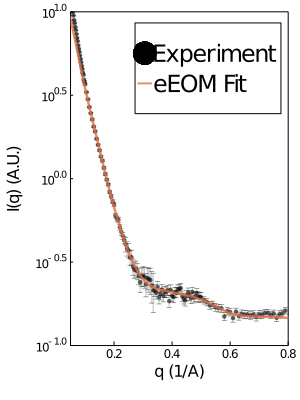

In [15]:
# Plot the eEOM results
p = scatter(data1[:,1], data1[:,2], yerror=data1[:,3], yscale=:log10, markersize=2.5, c=:black, markeralpha=0.6, linealpha=0.25, lab="Experiment", size=(300,450), legendfont=font(16), titlefont=font(20));
plot!(q, mean(pool1[:, survivors1[:, findall(fitness1 .== minimum(fitness1))[1]]], dims=2), lw=2.5, linealpha=0.8, lab="eEOM Fit")
plot!(size=(300,400), grid=false, legend=true, framestyle=:box);
xlims!(0.05, 0.8);
ylims!(0.1, 10)
xlabel!("q (1/A)");
ylabel!("I(q) (A.U.)")

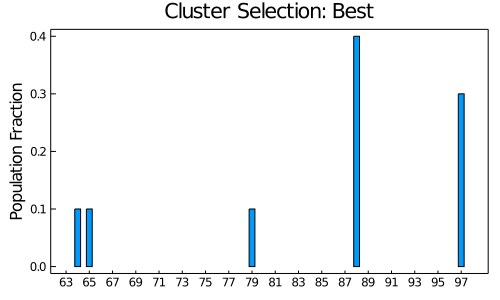

In [16]:
# Plot the best ensemble
best = survivors1[:, findall(fitness1 .== minimum(fitness1))[1]];
dic = countmap(reshape(best, (length(best), )));
b = bar(collect(keys(dic)), collect(values(dic)) / length(best), title="Cluster Selection: Best", xticks=collect(1:2:98), bar_width=0.5);
plot!(size=(500, 300), grid=false, legend=false, framestyle=:box);
ylabel!("Population Fraction")

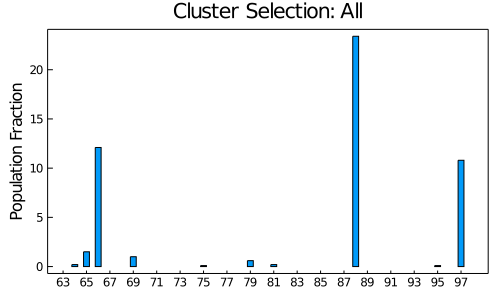

In [17]:
# Plot the all ensemble
dic = countmap(reshape(survivors1, (length(survivors1), )));
b = bar(collect(keys(dic)), collect(values(dic)) / length(best), title="Cluster Selection: All", xticks=collect(1:2:98), bar_width=0.5);
plot!(size=(500, 300), grid=false, legend=false, framestyle=:box);
ylabel!("Population Fraction")

And then one can do more analyses in the structures based on the selection. 


### Example 2

---

The `data2` and `pool2` pair. 

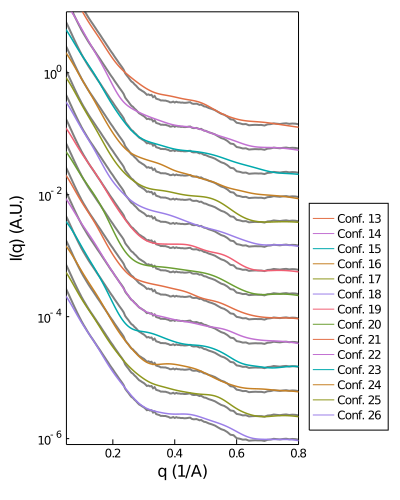

In [20]:
# Plot the data and see what's going on
p = plot(size=(400, 500), grid=false, legend=:outerbottomright, framestyle=:box);
s = 0.4;
for i = 1:14
    plot!(data2[:,1], s^(i-1) * data2[:,2], yscale=:log10, lw=2.0, c=:black, linealpha=0.5, lab="");
    plot!(q, s^(i-1)*pool2[:,7i-6], lw=1.5, yscale=:log10, lab="Conf. $(12+i)");
end
xlims!(0.05, 0.8)
ylims!(0.8e-6, 10)
ylabel!("I(q) (A.U.)")
xlabel!("q (1/A)")

In [19]:
# Run the eEOM structural refinement
# Try running from 0.1 to 1.0 due to better S/N
idx = findall(data2[:,1] .<= 1.0);
tmp = data2[idx, :];
ensize = 10;
cycles = 50;
survivors2 = zeros(Int64, ensize, cycles);
fitness2 = zeros(cycles);

t = @elapsed for i = 1:cycles
    @info("===== Cycle number $i ====");
    fitness2[i], survivor = Refine(tmp, [q pool2], ensize, 0.10; population=10, maxiter=100000, reports=10);
    survivors2[:,i] = survivor[:,1];
end

println("- eEOM for $cycles cycles and $(size(pool2, 2)) conformaitons took $(round(t, digits=2)) seconds.");

┌ Info: ===== Cycle number 1 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.14111, best fit so far = 5.09469.
Generation #20000: fitness = 5.14111, best fit so far = 5.09469.
Generation #30000: fitness = 5.14111, best fit so far = 5.09469.
Generation #40000: fitness = 5.14111, best fit so far = 5.09469.
Generation #50000: fitness = 5.11789, best fit so far = 4.95215.
Generation #60000: fitness = 5.14111, best fit so far = 4.90302.
Generation #70000: fitness = 5.32805, best fit so far = 4.90302.
Generation #80000: fitness = 5.15766, best fit so far = 4.90302.
Generation #90000: fitness = 5.28434, best fit so far = 4.90302.
Generation #100000: fitness = 5.2116, best fit so far = 4.90302.
Finished Genetic Algorithm, with best fitness = 4.90302.


┌ Info: ===== Cycle number 2 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.16178, best fit so far = 4.85306.
Generation #20000: fitness = 4.77376, best fit so far = 4.77376.
Generation #30000: fitness = 5.26739, best fit so far = 4.77376.
Generation #40000: fitness = 5.05083, best fit so far = 4.77376.
Generation #50000: fitness = 4.77376, best fit so far = 4.77376.
Generation #60000: fitness = 4.77376, best fit so far = 4.77376.
Generation #70000: fitness = 5.15766, best fit so far = 4.77376.
Generation #80000: fitness = 5.15766, best fit so far = 4.77376.
Generation #90000: fitness = 5.29207, best fit so far = 4.77376.
Generation #100000: fitness = 5.14111, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 3 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.09624, best fit so far = 5.09624.
Generation #20000: fitness = 5.09624, best fit so far = 4.92485.
Generation #30000: fitness = 5.41014, best fit so far = 4.92485.
Generation #40000: fitness = 5.42213, best fit so far = 4.92485.
Generation #50000: fitness = 5.41014, best fit so far = 4.92485.
Generation #60000: fitness = 5.14111, best fit so far = 4.90302.
Generation #70000: fitness = 5.42781, best fit so far = 4.90302.
Generation #80000: fitness = 5.14111, best fit so far = 4.90302.
Generation #90000: fitness = 5.14111, best fit so far = 4.90302.
Generation #100000: fitness = 5.17169, best fit so far = 4.85306.
Finished Genetic Algorithm, with best fitness = 4.85306.


┌ Info: ===== Cycle number 4 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.32412, best fit so far = 4.95084.
Generation #20000: fitness = 5.08407, best fit so far = 4.8183.
Generation #30000: fitness = 5.08407, best fit so far = 4.8183.
Generation #40000: fitness = 5.38052, best fit so far = 4.8183.
Generation #50000: fitness = 5.08407, best fit so far = 4.8183.
Generation #60000: fitness = 5.08407, best fit so far = 4.8183.
Generation #70000: fitness = 5.50941, best fit so far = 4.8183.
Generation #80000: fitness = 5.41014, best fit so far = 4.8183.
Generation #90000: fitness = 4.94775, best fit so far = 4.8183.
Generation #100000: fitness = 5.08407, best fit so far = 4.8183.
Finished Genetic Algorithm, with best fitness = 4.8183.


┌ Info: ===== Cycle number 5 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.14111, best fit so far = 5.09469.
Generation #20000: fitness = 5.14111, best fit so far = 5.06565.
Generation #30000: fitness = 5.14111, best fit so far = 5.06565.
Generation #40000: fitness = 5.47021, best fit so far = 5.06565.
Generation #50000: fitness = 5.14111, best fit so far = 5.06565.
Generation #60000: fitness = 5.1127, best fit so far = 5.06565.
Generation #70000: fitness = 5.16178, best fit so far = 4.85306.
Generation #80000: fitness = 5.14111, best fit so far = 4.85306.
Generation #90000: fitness = 5.14111, best fit so far = 4.85306.
Generation #100000: fitness = 5.19785, best fit so far = 4.85306.
Finished Genetic Algorithm, with best fitness = 4.85306.


┌ Info: ===== Cycle number 6 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.4871, best fit so far = 5.29901.
Generation #20000: fitness = 5.55498, best fit so far = 5.24036.
Generation #30000: fitness = 5.29207, best fit so far = 5.1014.
Generation #40000: fitness = 5.15766, best fit so far = 5.09696.
Generation #50000: fitness = 5.14111, best fit so far = 5.09696.
Generation #60000: fitness = 5.15766, best fit so far = 5.09696.
Generation #70000: fitness = 5.18258, best fit so far = 4.85306.
Generation #80000: fitness = 5.14551, best fit so far = 4.85306.
Generation #90000: fitness = 5.29207, best fit so far = 4.85306.
Generation #100000: fitness = 5.15766, best fit so far = 4.85306.
Finished Genetic Algorithm, with best fitness = 4.85306.


┌ Info: ===== Cycle number 7 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.44707, best fit so far = 5.04613.
Generation #20000: fitness = 5.30751, best fit so far = 4.85306.
Generation #30000: fitness = 5.41014, best fit so far = 4.85306.
Generation #40000: fitness = 4.94775, best fit so far = 4.77376.
Generation #50000: fitness = 5.08407, best fit so far = 4.77376.
Generation #60000: fitness = 5.08407, best fit so far = 4.77376.
Generation #70000: fitness = 5.08407, best fit so far = 4.77376.
Generation #80000: fitness = 5.08407, best fit so far = 4.77376.
Generation #90000: fitness = 5.23226, best fit so far = 4.77376.
Generation #100000: fitness = 5.23226, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 8 ====
└ @ Main In[19]:11


Generation #10000: fitness = 4.90302, best fit so far = 4.77376.
Generation #20000: fitness = 4.77376, best fit so far = 4.77376.
Generation #30000: fitness = 5.08407, best fit so far = 4.77376.
Generation #40000: fitness = 5.32412, best fit so far = 4.77376.
Generation #50000: fitness = 5.45203, best fit so far = 4.77376.
Generation #60000: fitness = 5.41014, best fit so far = 4.77376.
Generation #70000: fitness = 5.44968, best fit so far = 4.77376.
Generation #80000: fitness = 5.08407, best fit so far = 4.77376.
Generation #90000: fitness = 4.98403, best fit so far = 4.77376.
Generation #100000: fitness = 4.94775, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 9 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.29207, best fit so far = 4.90302.
Generation #20000: fitness = 5.15766, best fit so far = 4.90302.
Generation #30000: fitness = 5.11789, best fit so far = 4.85306.
Generation #40000: fitness = 5.15766, best fit so far = 4.85306.
Generation #50000: fitness = 5.15766, best fit so far = 4.85306.
Generation #60000: fitness = 5.42697, best fit so far = 4.85306.
Generation #70000: fitness = 5.15766, best fit so far = 4.85306.
Generation #80000: fitness = 5.34383, best fit so far = 4.85306.
Generation #90000: fitness = 5.29207, best fit so far = 4.85306.
Generation #100000: fitness = 4.90302, best fit so far = 4.85306.
Finished Genetic Algorithm, with best fitness = 4.85306.


┌ Info: ===== Cycle number 10 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.75482, best fit so far = 4.77376.
Generation #20000: fitness = 5.08407, best fit so far = 4.77376.
Generation #30000: fitness = 5.08407, best fit so far = 4.77376.
Generation #40000: fitness = 5.08407, best fit so far = 4.77376.
Generation #50000: fitness = 5.08407, best fit so far = 4.77376.
Generation #60000: fitness = 5.08407, best fit so far = 4.77376.
Generation #70000: fitness = 5.3504, best fit so far = 4.77376.
Generation #80000: fitness = 5.3504, best fit so far = 4.77376.
Generation #90000: fitness = 5.08407, best fit so far = 4.77376.
Generation #100000: fitness = 5.08407, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 11 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.47021, best fit so far = 4.85306.
Generation #20000: fitness = 5.39049, best fit so far = 4.85306.
Generation #30000: fitness = 5.11789, best fit so far = 4.85306.
Generation #40000: fitness = 5.29207, best fit so far = 4.85306.
Generation #50000: fitness = 5.15766, best fit so far = 4.85306.
Generation #60000: fitness = 5.15766, best fit so far = 4.85306.
Generation #70000: fitness = 4.77376, best fit so far = 4.77376.
Generation #80000: fitness = 4.77376, best fit so far = 4.77376.
Generation #90000: fitness = 4.77376, best fit so far = 4.77376.
Generation #100000: fitness = 5.25402, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 12 ====
└ @ Main In[19]:11


Generation #10000: fitness = 4.92485, best fit so far = 4.86981.
Generation #20000: fitness = 5.08407, best fit so far = 4.86981.
Generation #30000: fitness = 4.98403, best fit so far = 4.86981.
Generation #40000: fitness = 5.07127, best fit so far = 4.86981.
Generation #50000: fitness = 5.23226, best fit so far = 4.86981.
Generation #60000: fitness = 5.24634, best fit so far = 4.86981.
Generation #70000: fitness = 5.09296, best fit so far = 4.86981.
Generation #80000: fitness = 5.08407, best fit so far = 4.86981.
Generation #90000: fitness = 5.08407, best fit so far = 4.86981.
Generation #100000: fitness = 5.08407, best fit so far = 4.86981.
Finished Genetic Algorithm, with best fitness = 4.86981.


┌ Info: ===== Cycle number 13 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.08407, best fit so far = 4.77376.
Generation #20000: fitness = 5.08407, best fit so far = 4.77376.
Generation #30000: fitness = 5.08407, best fit so far = 4.77376.
Generation #40000: fitness = 5.08407, best fit so far = 4.77376.
Generation #50000: fitness = 5.08407, best fit so far = 4.77376.
Generation #60000: fitness = 5.08407, best fit so far = 4.77376.
Generation #70000: fitness = 5.08407, best fit so far = 4.77376.
Generation #80000: fitness = 4.98403, best fit so far = 4.77376.
Generation #90000: fitness = 5.30499, best fit so far = 4.77376.
Generation #100000: fitness = 5.08407, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 14 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.08407, best fit so far = 4.89904.
Generation #20000: fitness = 4.89904, best fit so far = 4.89904.
Generation #30000: fitness = 5.29405, best fit so far = 4.89904.
Generation #40000: fitness = 5.08407, best fit so far = 4.86981.
Generation #50000: fitness = 5.23226, best fit so far = 4.86981.
Generation #60000: fitness = 5.08407, best fit so far = 4.86981.
Generation #70000: fitness = 4.86981, best fit so far = 4.86981.
Generation #80000: fitness = 5.08407, best fit so far = 4.86981.
Generation #90000: fitness = 4.98403, best fit so far = 4.86981.
Generation #100000: fitness = 5.08407, best fit so far = 4.86981.
Finished Genetic Algorithm, with best fitness = 4.86981.


┌ Info: ===== Cycle number 15 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.25473, best fit so far = 4.85306.
Generation #20000: fitness = 5.38299, best fit so far = 4.85306.
Generation #30000: fitness = 5.15766, best fit so far = 4.85306.
Generation #40000: fitness = 5.14111, best fit so far = 4.85306.
Generation #50000: fitness = 5.14111, best fit so far = 4.85306.
Generation #60000: fitness = 5.14551, best fit so far = 4.85306.
Generation #70000: fitness = 5.15766, best fit so far = 4.85306.
Generation #80000: fitness = 5.15766, best fit so far = 4.85306.
Generation #90000: fitness = 5.14111, best fit so far = 4.85306.
Generation #100000: fitness = 5.14111, best fit so far = 4.85306.
Finished Genetic Algorithm, with best fitness = 4.85306.


┌ Info: ===== Cycle number 16 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.15766, best fit so far = 5.1014.
Generation #20000: fitness = 5.15766, best fit so far = 4.85306.
Generation #30000: fitness = 5.14111, best fit so far = 4.85306.
Generation #40000: fitness = 5.14111, best fit so far = 4.85306.
Generation #50000: fitness = 5.14111, best fit so far = 4.85306.
Generation #60000: fitness = 5.26924, best fit so far = 4.85306.
Generation #70000: fitness = 5.11745, best fit so far = 4.85306.
Generation #80000: fitness = 4.90302, best fit so far = 4.85306.
Generation #90000: fitness = 4.90302, best fit so far = 4.85306.
Generation #100000: fitness = 4.90302, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 17 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.14111, best fit so far = 5.1127.
Generation #20000: fitness = 5.14111, best fit so far = 5.1127.
Generation #30000: fitness = 5.15766, best fit so far = 5.1127.
Generation #40000: fitness = 5.65622, best fit so far = 4.92485.
Generation #50000: fitness = 5.08407, best fit so far = 4.89904.
Generation #60000: fitness = 5.08407, best fit so far = 4.86981.
Generation #70000: fitness = 5.08407, best fit so far = 4.86981.
Generation #80000: fitness = 5.08407, best fit so far = 4.86981.
Generation #90000: fitness = 5.08407, best fit so far = 4.86981.
Generation #100000: fitness = 5.08407, best fit so far = 4.86981.
Finished Genetic Algorithm, with best fitness = 4.86981.


┌ Info: ===== Cycle number 18 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.41984, best fit so far = 4.95084.
Generation #20000: fitness = 4.90302, best fit so far = 4.77376.
Generation #30000: fitness = 4.90302, best fit so far = 4.77376.
Generation #40000: fitness = 4.94775, best fit so far = 4.77376.
Generation #50000: fitness = 5.2827, best fit so far = 4.77376.
Generation #60000: fitness = 5.10429, best fit so far = 4.77376.
Generation #70000: fitness = 4.98403, best fit so far = 4.77376.
Generation #80000: fitness = 4.94775, best fit so far = 4.77376.
Generation #90000: fitness = 5.38052, best fit so far = 4.77376.
Generation #100000: fitness = 5.2744, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 19 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.11789, best fit so far = 4.85306.
Generation #20000: fitness = 5.29207, best fit so far = 4.85306.
Generation #30000: fitness = 5.15766, best fit so far = 4.85306.
Generation #40000: fitness = 5.29207, best fit so far = 4.85306.
Generation #50000: fitness = 5.29207, best fit so far = 4.85306.
Generation #60000: fitness = 5.15766, best fit so far = 4.85306.
Generation #70000: fitness = 5.39695, best fit so far = 4.85306.
Generation #80000: fitness = 5.42781, best fit so far = 4.85306.
Generation #90000: fitness = 5.14111, best fit so far = 4.85306.
Generation #100000: fitness = 5.14111, best fit so far = 4.85306.
Finished Genetic Algorithm, with best fitness = 4.85306.


┌ Info: ===== Cycle number 20 ====
└ @ Main In[19]:11


Generation #10000: fitness = 4.89904, best fit so far = 4.89904.
Generation #20000: fitness = 5.08407, best fit so far = 4.89904.
Generation #30000: fitness = 5.08407, best fit so far = 4.89904.
Generation #40000: fitness = 5.08407, best fit so far = 4.86981.
Generation #50000: fitness = 5.08407, best fit so far = 4.86981.
Generation #60000: fitness = 5.26365, best fit so far = 4.86981.
Generation #70000: fitness = 5.15766, best fit so far = 4.85306.
Generation #80000: fitness = 5.15766, best fit so far = 4.85306.
Generation #90000: fitness = 5.51203, best fit so far = 4.85306.
Generation #100000: fitness = 5.14111, best fit so far = 4.85306.
Finished Genetic Algorithm, with best fitness = 4.85306.


┌ Info: ===== Cycle number 21 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.08407, best fit so far = 4.89904.
Generation #20000: fitness = 4.95084, best fit so far = 4.86981.
Generation #30000: fitness = 4.90302, best fit so far = 4.77376.
Generation #40000: fitness = 4.90302, best fit so far = 4.77376.
Generation #50000: fitness = 5.11789, best fit so far = 4.77376.
Generation #60000: fitness = 5.14111, best fit so far = 4.77376.
Generation #70000: fitness = 5.15766, best fit so far = 4.77376.
Generation #80000: fitness = 5.29207, best fit so far = 4.77376.
Generation #90000: fitness = 5.47021, best fit so far = 4.77376.
Generation #100000: fitness = 5.15766, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 22 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.96964, best fit so far = 5.1127.
Generation #20000: fitness = 5.15766, best fit so far = 5.1127.
Generation #30000: fitness = 5.15766, best fit so far = 5.1127.
Generation #40000: fitness = 5.14111, best fit so far = 5.1127.
Generation #50000: fitness = 5.14111, best fit so far = 5.1127.
Generation #60000: fitness = 5.15766, best fit so far = 5.1127.
Generation #70000: fitness = 5.15766, best fit so far = 5.1127.
Generation #80000: fitness = 5.15766, best fit so far = 5.1127.
Generation #90000: fitness = 5.15766, best fit so far = 5.1127.
Generation #100000: fitness = 5.29207, best fit so far = 5.1127.
Finished Genetic Algorithm, with best fitness = 5.1127.


┌ Info: ===== Cycle number 23 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.32412, best fit so far = 4.99634.
Generation #20000: fitness = 5.46391, best fit so far = 4.85306.
Generation #30000: fitness = 5.14111, best fit so far = 4.85306.
Generation #40000: fitness = 5.29207, best fit so far = 4.85306.
Generation #50000: fitness = 5.29207, best fit so far = 4.85306.
Generation #60000: fitness = 5.14111, best fit so far = 4.85306.
Generation #70000: fitness = 5.14111, best fit so far = 4.85306.
Generation #80000: fitness = 5.29207, best fit so far = 4.85306.
Generation #90000: fitness = 5.38603, best fit so far = 4.85306.
Generation #100000: fitness = 5.15766, best fit so far = 4.85306.
Finished Genetic Algorithm, with best fitness = 4.85306.


┌ Info: ===== Cycle number 24 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.14111, best fit so far = 5.1127.
Generation #20000: fitness = 5.14111, best fit so far = 5.1127.
Generation #30000: fitness = 5.14111, best fit so far = 5.1127.
Generation #40000: fitness = 5.14111, best fit so far = 5.1127.
Generation #50000: fitness = 5.14111, best fit so far = 5.1127.
Generation #60000: fitness = 5.14111, best fit so far = 5.1127.
Generation #70000: fitness = 5.15766, best fit so far = 5.1127.
Generation #80000: fitness = 5.15766, best fit so far = 5.1127.
Generation #90000: fitness = 5.15766, best fit so far = 5.1127.
Generation #100000: fitness = 5.29207, best fit so far = 5.1127.
Finished Genetic Algorithm, with best fitness = 5.1127.


┌ Info: ===== Cycle number 25 ====
└ @ Main In[19]:11


Generation #10000: fitness = 4.98403, best fit so far = 4.86981.
Generation #20000: fitness = 5.08407, best fit so far = 4.86981.
Generation #30000: fitness = 5.08407, best fit so far = 4.86981.
Generation #40000: fitness = 5.08407, best fit so far = 4.86981.
Generation #50000: fitness = 5.08407, best fit so far = 4.86981.
Generation #60000: fitness = 5.08407, best fit so far = 4.86981.
Generation #70000: fitness = 5.08407, best fit so far = 4.86981.
Generation #80000: fitness = 5.08407, best fit so far = 4.86981.
Generation #90000: fitness = 4.98403, best fit so far = 4.86981.
Generation #100000: fitness = 4.98403, best fit so far = 4.86981.
Finished Genetic Algorithm, with best fitness = 4.86981.


┌ Info: ===== Cycle number 26 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.41014, best fit so far = 5.00644.
Generation #20000: fitness = 4.90302, best fit so far = 4.85306.
Generation #30000: fitness = 4.90302, best fit so far = 4.85306.
Generation #40000: fitness = 4.90302, best fit so far = 4.85306.
Generation #50000: fitness = 5.28796, best fit so far = 4.85306.
Generation #60000: fitness = 5.0632, best fit so far = 4.85306.
Generation #70000: fitness = 5.24672, best fit so far = 4.85306.
Generation #80000: fitness = 5.32412, best fit so far = 4.85306.
Generation #90000: fitness = 5.41796, best fit so far = 4.85306.
Generation #100000: fitness = 5.40717, best fit so far = 4.85306.
Finished Genetic Algorithm, with best fitness = 4.85306.


┌ Info: ===== Cycle number 27 ====
└ @ Main In[19]:11


Generation #10000: fitness = 4.95084, best fit so far = 4.95084.
Generation #20000: fitness = 5.28111, best fit so far = 4.92485.
Generation #30000: fitness = 5.08407, best fit so far = 4.92485.
Generation #40000: fitness = 5.08407, best fit so far = 4.86981.
Generation #50000: fitness = 5.08407, best fit so far = 4.86981.
Generation #60000: fitness = 5.20344, best fit so far = 4.86981.
Generation #70000: fitness = 4.98403, best fit so far = 4.86981.
Generation #80000: fitness = 5.08407, best fit so far = 4.86981.
Generation #90000: fitness = 5.08407, best fit so far = 4.86981.
Generation #100000: fitness = 5.08407, best fit so far = 4.86981.
Finished Genetic Algorithm, with best fitness = 4.86981.


┌ Info: ===== Cycle number 28 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.15766, best fit so far = 5.1127.
Generation #20000: fitness = 5.26344, best fit so far = 5.1127.
Generation #30000: fitness = 5.15766, best fit so far = 5.1127.
Generation #40000: fitness = 5.15766, best fit so far = 5.1127.
Generation #50000: fitness = 5.15766, best fit so far = 5.1127.
Generation #60000: fitness = 5.15766, best fit so far = 5.09696.
Generation #70000: fitness = 5.37021, best fit so far = 4.90302.
Generation #80000: fitness = 5.05083, best fit so far = 4.77376.
Generation #90000: fitness = 4.99712, best fit so far = 4.77376.
Generation #100000: fitness = 5.3504, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 29 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.43026, best fit so far = 5.1686.
Generation #20000: fitness = 4.914, best fit so far = 4.77376.
Generation #30000: fitness = 5.09624, best fit so far = 4.77376.
Generation #40000: fitness = 5.09624, best fit so far = 4.77376.
Generation #50000: fitness = 5.07939, best fit so far = 4.77376.
Generation #60000: fitness = 5.08407, best fit so far = 4.77376.
Generation #70000: fitness = 4.98403, best fit so far = 4.77376.
Generation #80000: fitness = 5.08407, best fit so far = 4.77376.
Generation #90000: fitness = 4.98403, best fit so far = 4.77376.
Generation #100000: fitness = 5.08407, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 30 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.18515, best fit so far = 5.08407.
Generation #20000: fitness = 4.98403, best fit so far = 4.86981.
Generation #30000: fitness = 5.21312, best fit so far = 4.86981.
Generation #40000: fitness = 5.45329, best fit so far = 4.85306.
Generation #50000: fitness = 5.15766, best fit so far = 4.85306.
Generation #60000: fitness = 5.15766, best fit so far = 4.85306.
Generation #70000: fitness = 5.15766, best fit so far = 4.85306.
Generation #80000: fitness = 5.15766, best fit so far = 4.85306.
Generation #90000: fitness = 5.15766, best fit so far = 4.85306.
Generation #100000: fitness = 5.39364, best fit so far = 4.85306.
Finished Genetic Algorithm, with best fitness = 4.85306.


┌ Info: ===== Cycle number 31 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.36033, best fit so far = 5.05083.
Generation #20000: fitness = 5.41014, best fit so far = 5.05083.
Generation #30000: fitness = 5.29207, best fit so far = 4.85306.
Generation #40000: fitness = 5.14111, best fit so far = 4.85306.
Generation #50000: fitness = 5.64209, best fit so far = 4.85306.
Generation #60000: fitness = 4.98403, best fit so far = 4.85306.
Generation #70000: fitness = 5.08407, best fit so far = 4.77376.
Generation #80000: fitness = 4.98403, best fit so far = 4.77376.
Generation #90000: fitness = 5.08407, best fit so far = 4.77376.
Generation #100000: fitness = 5.08407, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.
Generation #10000: fitness = 5.87354, best fit so far = 4.85306.

┌ Info: ===== Cycle number 32 ====
└ @ Main In[19]:11



Generation #20000: fitness = 5.36033, best fit so far = 4.85306.
Generation #30000: fitness = 5.37617, best fit so far = 4.85306.
Generation #40000: fitness = 4.90302, best fit so far = 4.77376.
Generation #50000: fitness = 5.15766, best fit so far = 4.77376.
Generation #60000: fitness = 5.55146, best fit so far = 4.77376.
Generation #70000: fitness = 5.21707, best fit so far = 4.77376.
Generation #80000: fitness = 5.08884, best fit so far = 4.77376.
Generation #90000: fitness = 4.98403, best fit so far = 4.77376.
Generation #100000: fitness = 4.98403, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 33 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.08407, best fit so far = 4.89904.
Generation #20000: fitness = 5.18515, best fit so far = 4.89904.
Generation #30000: fitness = 5.08407, best fit so far = 4.89904.
Generation #40000: fitness = 5.08407, best fit so far = 4.86981.
Generation #50000: fitness = 5.08407, best fit so far = 4.86981.
Generation #60000: fitness = 5.08407, best fit so far = 4.86981.
Generation #70000: fitness = 4.98403, best fit so far = 4.86981.
Generation #80000: fitness = 5.08407, best fit so far = 4.86981.
Generation #90000: fitness = 5.08407, best fit so far = 4.86981.
Generation #100000: fitness = 5.09296, best fit so far = 4.86981.
Finished Genetic Algorithm, with best fitness = 4.86981.


┌ Info: ===== Cycle number 34 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.32412, best fit so far = 4.95084.
Generation #20000: fitness = 5.58939, best fit so far = 4.95084.
Generation #30000: fitness = 5.41014, best fit so far = 4.95084.
Generation #40000: fitness = 5.536, best fit so far = 4.95084.
Generation #50000: fitness = 4.90302, best fit so far = 4.77376.
Generation #60000: fitness = 4.90302, best fit so far = 4.77376.
Generation #70000: fitness = 5.15766, best fit so far = 4.77376.
Generation #80000: fitness = 5.60939, best fit so far = 4.77376.
Generation #90000: fitness = 5.44968, best fit so far = 4.77376.
Generation #100000: fitness = 5.40272, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 35 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.46237, best fit so far = 4.9075.
Generation #20000: fitness = 5.536, best fit so far = 4.9075.
Generation #30000: fitness = 5.41014, best fit so far = 4.9075.
Generation #40000: fitness = 5.41014, best fit so far = 4.9075.
Generation #50000: fitness = 4.92485, best fit so far = 4.9075.
Generation #60000: fitness = 4.92485, best fit so far = 4.8183.
Generation #70000: fitness = 4.77376, best fit so far = 4.77376.
Generation #80000: fitness = 5.03772, best fit so far = 4.77376.
Generation #90000: fitness = 5.40717, best fit so far = 4.77376.
Generation #100000: fitness = 5.41014, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 36 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.40382, best fit so far = 4.86981.
Generation #20000: fitness = 5.54676, best fit so far = 4.86981.
Generation #30000: fitness = 4.77376, best fit so far = 4.77376.
Generation #40000: fitness = 4.90302, best fit so far = 4.77376.
Generation #50000: fitness = 5.29207, best fit so far = 4.77376.
Generation #60000: fitness = 5.09696, best fit so far = 4.77376.
Generation #70000: fitness = 5.29644, best fit so far = 4.77376.
Generation #80000: fitness = 5.47021, best fit so far = 4.77376.
Generation #90000: fitness = 5.14111, best fit so far = 4.77376.
Generation #100000: fitness = 5.14111, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 37 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.15766, best fit so far = 5.09469.
Generation #20000: fitness = 5.15766, best fit so far = 5.09469.
Generation #30000: fitness = 5.29207, best fit so far = 5.09469.
Generation #40000: fitness = 5.29207, best fit so far = 5.09469.
Generation #50000: fitness = 5.29207, best fit so far = 5.09469.
Generation #60000: fitness = 5.15766, best fit so far = 5.09469.
Generation #70000: fitness = 5.15766, best fit so far = 5.09469.
Generation #80000: fitness = 5.15766, best fit so far = 5.09469.
Generation #90000: fitness = 5.15766, best fit so far = 5.09469.
Generation #100000: fitness = 5.15766, best fit so far = 5.09469.
Finished Genetic Algorithm, with best fitness = 5.09469.


┌ Info: ===== Cycle number 38 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.08407, best fit so far = 5.07244.
Generation #20000: fitness = 5.08407, best fit so far = 4.77376.
Generation #30000: fitness = 5.18515, best fit so far = 4.77376.
Generation #40000: fitness = 5.24358, best fit so far = 4.77376.
Generation #50000: fitness = 5.37617, best fit so far = 4.77376.
Generation #60000: fitness = 4.98403, best fit so far = 4.77376.
Generation #70000: fitness = 5.01049, best fit so far = 4.77376.
Generation #80000: fitness = 5.1575, best fit so far = 4.77376.
Generation #90000: fitness = 5.38052, best fit so far = 4.77376.
Generation #100000: fitness = 4.94775, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.
Generation #10000: fitness = 5.08407, best fit so far = 4.98403.


┌ Info: ===== Cycle number 39 ====
└ @ Main In[19]:11


Generation #20000: fitness = 5.08407, best fit so far = 4.89904.
Generation #30000: fitness = 5.08407, best fit so far = 4.89904.
Generation #40000: fitness = 5.08407, best fit so far = 4.89904.
Generation #50000: fitness = 5.08407, best fit so far = 4.89904.
Generation #60000: fitness = 5.3504, best fit so far = 4.89904.
Generation #70000: fitness = 5.08407, best fit so far = 4.89904.
Generation #80000: fitness = 5.08407, best fit so far = 4.86981.
Generation #90000: fitness = 5.08407, best fit so far = 4.86981.
Generation #100000: fitness = 5.08407, best fit so far = 4.86981.
Finished Genetic Algorithm, with best fitness = 4.86981.


┌ Info: ===== Cycle number 40 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.41014, best fit so far = 4.77376.
Generation #20000: fitness = 5.41014, best fit so far = 4.77376.
Generation #30000: fitness = 4.98403, best fit so far = 4.77376.
Generation #40000: fitness = 5.3552, best fit so far = 4.77376.
Generation #50000: fitness = 5.08407, best fit so far = 4.77376.
Generation #60000: fitness = 5.08407, best fit so far = 4.77376.
Generation #70000: fitness = 5.08407, best fit so far = 4.77376.
Generation #80000: fitness = 5.08407, best fit so far = 4.77376.
Generation #90000: fitness = 5.05707, best fit so far = 4.77376.
Generation #100000: fitness = 5.08407, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 41 ====
└ @ Main In[19]:11


Generation #10000: fitness = 4.94775, best fit so far = 4.92485.
Generation #20000: fitness = 5.08407, best fit so far = 4.86981.
Generation #30000: fitness = 5.08407, best fit so far = 4.86981.
Generation #40000: fitness = 5.08407, best fit so far = 4.86981.
Generation #50000: fitness = 5.08407, best fit so far = 4.86981.
Generation #60000: fitness = 5.09296, best fit so far = 4.86981.
Generation #70000: fitness = 5.08407, best fit so far = 4.86981.
Generation #80000: fitness = 5.44069, best fit so far = 4.86981.
Generation #90000: fitness = 4.98403, best fit so far = 4.77376.
Generation #100000: fitness = 5.08407, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 42 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.15766, best fit so far = 5.09696.
Generation #20000: fitness = 5.29207, best fit so far = 5.09696.
Generation #30000: fitness = 5.14111, best fit so far = 5.09696.
Generation #40000: fitness = 5.15766, best fit so far = 5.09696.
Generation #50000: fitness = 5.15766, best fit so far = 5.09696.
Generation #60000: fitness = 5.12645, best fit so far = 5.09696.
Generation #70000: fitness = 4.90302, best fit so far = 4.85306.
Generation #80000: fitness = 5.51895, best fit so far = 4.85306.
Generation #90000: fitness = 5.08407, best fit so far = 4.85306.
Generation #100000: fitness = 5.08407, best fit so far = 4.85306.
Finished Genetic Algorithm, with best fitness = 4.85306.


┌ Info: ===== Cycle number 43 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.08407, best fit so far = 4.99634.
Generation #20000: fitness = 4.98403, best fit so far = 4.77376.
Generation #30000: fitness = 5.08407, best fit so far = 4.77376.
Generation #40000: fitness = 5.08407, best fit so far = 4.77376.
Generation #50000: fitness = 5.08407, best fit so far = 4.77376.
Generation #60000: fitness = 5.08407, best fit so far = 4.77376.
Generation #70000: fitness = 5.08407, best fit so far = 4.77376.
Generation #80000: fitness = 5.08407, best fit so far = 4.77376.
Generation #90000: fitness = 5.08407, best fit so far = 4.77376.
Generation #100000: fitness = 5.08407, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 44 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.14111, best fit so far = 5.1127.
Generation #20000: fitness = 5.14111, best fit so far = 5.09469.
Generation #30000: fitness = 4.90302, best fit so far = 4.85306.
Generation #40000: fitness = 4.85306, best fit so far = 4.85306.
Generation #50000: fitness = 5.45689, best fit so far = 4.85306.
Generation #60000: fitness = 5.15766, best fit so far = 4.85306.
Generation #70000: fitness = 5.15766, best fit so far = 4.85306.
Generation #80000: fitness = 5.15766, best fit so far = 4.85306.
Generation #90000: fitness = 5.14111, best fit so far = 4.85306.
Generation #100000: fitness = 5.15766, best fit so far = 4.85306.
Finished Genetic Algorithm, with best fitness = 4.85306.
Generation #10000: fitness = 5.19702, best fit so far = 4.89904.


┌ Info: ===== Cycle number 45 ====
└ @ Main In[19]:11


Generation #20000: fitness = 5.08407, best fit so far = 4.89904.
Generation #30000: fitness = 5.08407, best fit so far = 4.89904.
Generation #40000: fitness = 5.08407, best fit so far = 4.86981.
Generation #50000: fitness = 5.08407, best fit so far = 4.86981.
Generation #60000: fitness = 5.08407, best fit so far = 4.86981.
Generation #70000: fitness = 4.94775, best fit so far = 4.86981.
Generation #80000: fitness = 5.08407, best fit so far = 4.86981.
Generation #90000: fitness = 5.08407, best fit so far = 4.86981.
Generation #100000: fitness = 4.94775, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 46 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.29207, best fit so far = 5.1127.
Generation #20000: fitness = 5.11789, best fit so far = 4.95215.
Generation #30000: fitness = 5.11789, best fit so far = 4.95215.
Generation #40000: fitness = 5.14111, best fit so far = 4.95215.
Generation #50000: fitness = 5.14111, best fit so far = 4.95215.
Generation #60000: fitness = 5.14111, best fit so far = 4.95215.
Generation #70000: fitness = 5.14111, best fit so far = 4.95215.
Generation #80000: fitness = 5.14111, best fit so far = 4.95215.
Generation #90000: fitness = 5.14111, best fit so far = 4.95215.
Generation #100000: fitness = 5.14111, best fit so far = 4.95215.
Finished Genetic Algorithm, with best fitness = 4.95215.


┌ Info: ===== Cycle number 47 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.09624, best fit so far = 5.09624.
Generation #20000: fitness = 5.74772, best fit so far = 5.00213.
Generation #30000: fitness = 5.14111, best fit so far = 5.00213.
Generation #40000: fitness = 5.29207, best fit so far = 5.00213.
Generation #50000: fitness = 5.15766, best fit so far = 5.00213.
Generation #60000: fitness = 5.34383, best fit so far = 5.00213.
Generation #70000: fitness = 5.14111, best fit so far = 5.00213.
Generation #80000: fitness = 5.30369, best fit so far = 5.00213.
Generation #90000: fitness = 5.15766, best fit so far = 5.00213.
Generation #100000: fitness = 5.38704, best fit so far = 5.00213.
Finished Genetic Algorithm, with best fitness = 5.00213.


┌ Info: ===== Cycle number 48 ====
└ @ Main In[19]:11


Generation #10000: fitness = 4.98403, best fit so far = 4.92485.
Generation #20000: fitness = 5.08407, best fit so far = 4.89904.
Generation #30000: fitness = 5.08407, best fit so far = 4.89904.
Generation #40000: fitness = 5.08407, best fit so far = 4.89904.
Generation #50000: fitness = 5.08407, best fit so far = 4.89904.
Generation #60000: fitness = 5.08407, best fit so far = 4.89904.
Generation #70000: fitness = 5.08407, best fit so far = 4.86981.
Generation #80000: fitness = 5.3504, best fit so far = 4.86981.
Generation #90000: fitness = 4.98403, best fit so far = 4.86981.
Generation #100000: fitness = 5.08407, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 49 ====
└ @ Main In[19]:11


Generation #10000: fitness = 4.90302, best fit so far = 4.77376.
Generation #20000: fitness = 4.90302, best fit so far = 4.77376.
Generation #30000: fitness = 5.11789, best fit so far = 4.77376.
Generation #40000: fitness = 5.45022, best fit so far = 4.77376.
Generation #50000: fitness = 5.37217, best fit so far = 4.77376.
Generation #60000: fitness = 5.32412, best fit so far = 4.77376.
Generation #70000: fitness = 5.28796, best fit so far = 4.77376.
Generation #80000: fitness = 5.21312, best fit so far = 4.77376.
Generation #90000: fitness = 4.90302, best fit so far = 4.77376.
Generation #100000: fitness = 4.90302, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.


┌ Info: ===== Cycle number 50 ====
└ @ Main In[19]:11


Generation #10000: fitness = 5.3504, best fit so far = 4.9828.
Generation #20000: fitness = 5.08407, best fit so far = 4.9828.
Generation #30000: fitness = 5.08407, best fit so far = 4.89904.
Generation #40000: fitness = 5.3504, best fit so far = 4.89904.
Generation #50000: fitness = 5.3504, best fit so far = 4.89904.
Generation #60000: fitness = 4.98403, best fit so far = 4.89904.
Generation #70000: fitness = 5.09296, best fit so far = 4.86981.
Generation #80000: fitness = 5.08407, best fit so far = 4.86981.
Generation #90000: fitness = 4.98403, best fit so far = 4.77376.
Generation #100000: fitness = 5.08407, best fit so far = 4.77376.
Finished Genetic Algorithm, with best fitness = 4.77376.
- eEOM for 50 cycles and 98 conformaitons took 1301.39 seconds.


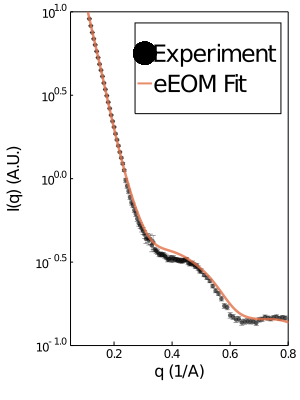

In [21]:
# Plot the eEOM results
p = scatter(data2[:,1], data2[:,2], yerror=data2[:,3], yscale=:log10, markersize=2.5, c=:black, markeralpha=0.6, linealpha=0.25, lab="Experiment", size=(300,450), legendfont=font(16), titlefont=font(20));
plot!(q, mean(pool2[:, survivors2[:, findall(fitness2 .== minimum(fitness2))[1]]], dims=2), lw=2.5, linealpha=0.8, lab="eEOM Fit")
plot!(size=(300, 400), grid=false, legend=true, framestyle=:box);
xlims!(0.05, 0.8);
ylims!(0.1, 10)
xlabel!("q (1/A)");
ylabel!("I(q) (A.U.)")

The mismatch might be due to the following

1. High $S/N$ 
2. Missing the correct structures in the pool 
3. `ensize` too small given bimodal or multi-state molecules
4. `pool` size too small
5. Imbalance at low and high `q`


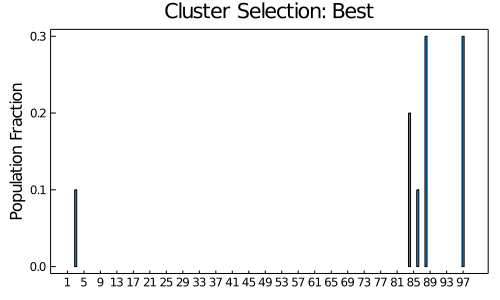

In [23]:
# Plot the best ensemble
best = survivors2[:, findall(fitness2 .== minimum(fitness2))[1]];
dic = countmap(reshape(best, (length(best), )));
b = bar(collect(keys(dic)), collect(values(dic)) / length(best), title="Cluster Selection: Best", xticks=collect(1:4:98), bar_width=0.5);
plot!(size=(500, 300), grid=false, legend=false, framestyle=:box);
ylabel!("Population Fraction")

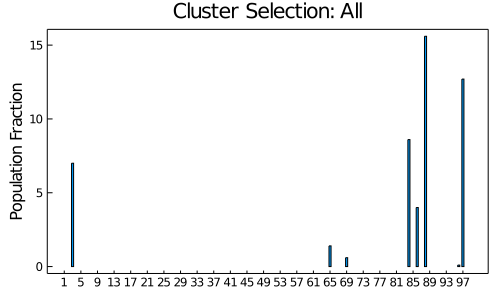

In [24]:
# Plot the all ensemble
dic = countmap(reshape(survivors2, (length(survivors2), )));
b = bar(collect(keys(dic)), collect(values(dic)) / length(best), title="Cluster Selection: All", xticks=collect(1:4:98), bar_width=0.5);
plot!(size=(500, 300), grid=false, legend=false, framestyle=:box);
ylabel!("Population Fraction")

The `survivors` from `data1` and `data2` are quite consistent, picking `#88` and `#97` very frequently. The mismatch between `fit` and `exp` suggests more care is need for building the structural pool for refinement. 


### Notes

---

1. The `Refine` function can be sped up quite a lot using parallelism in `julia` and should be ready for direct parallelization given its little memory consumption.
2. The customized $\chi^2$ is $S/N$-dependent as well as `pool`-dependent, further study *in preparation*.
3. The eEOM has been cross-validated using 10-fold CV and different $S/N$ in the same experimental data. Note that the `data1` and `data2` are the same molecule with different $S/N$ and the `pool1` and `pool2` are the same with ddifferent scaling parameter. The results are consistent. 
4. Note that the profile needs to be distinguished apart by a given set of experimental data and error. 


### References

---

1. **Chen, YL.** et al., Salt Dependence of A-Form RNA Duplexes: Structures and Implications. *J. Phys. Chem. B* 2019, 123, 46, 9773-9785


### License

---

Academic Free License v. 3.0


### Copyright

---

(c) Yen-Lin Chen, 2018 - 2020